Data: https://universe.roboflow.com/yolo-do-it-yhopz/helmet-detector-9rzmg-bmd6q

# YOLO Training Configuration Parameters

This document explains the additional parameters used in the YOLO training process. These parameters allow for customization and optimization of the training pipeline.

## Parameters Explanation

### `batch=16`
- **Description**: Sets the batch size for training.
- **Impact**: Higher values may improve training speed but require more GPU memory.

### `device=0`
- **Description**: Specifies the GPU ID to use for training.
- **Options**: 
  - Use `0`, `1`, etc., for specific GPU IDs.
  - Use `'cpu'` if no GPU is available.

### `lr0=0.01`
- **Description**: Sets the initial learning rate for the optimizer.
- **Impact**: Affects how quickly the model weights are updated during training.

### `optimizer='Adam'`
- **Description**: Chooses the optimizer for training.
- **Options**:
  - `'Adam'` for Adam optimizer.
  - `'SGD'` for Stochastic Gradient Descent.

### `workers=8`
- **Description**: Specifies the number of worker threads for data loading.
- **Impact**: Higher values can improve data loading speeds but may require more system resources.

### `seed=42`
- **Description**: Ensures reproducibility by setting a random seed.
- **Impact**: Makes training results consistent across different runs.

### `patience=10`
- **Description**: Implements early stopping if validation metrics do not improve for the specified number of epochs.
- **Impact**: Prevents overfitting and saves training time.

### `weight_decay=0.0005`
- **Description**: Applies weight decay for regularization.
- **Impact**: Reduces overfitting by penalizing large weights.

### `momentum=0.937`
- **Description**: Momentum parameter for optimizers like SGD.
- **Impact**: Helps accelerate gradients vectors in the right direction, leading to faster convergence.

### `name='exp_name'`
- **Description**: Names the experiment and creates a folder in the `runs/train` directory.
- **Impact**: Helps organize and identify training experiments.

### `verbose=True`
- **Description**: Outputs detailed logs during training.
- **Impact**: Provides more visibility into the training process.

---

## Example Usage

```python
results = model.train(
    data="data.yaml",   # Path to dataset YAML file
    epochs=100,         # Number of training epochs
    imgsz=640,          # Image size (resolution)
    batch=16,           # Batch size
    device=0,           # GPU ID or 'cpu'
    lr0=0.01,           # Initial learning rate
    optimizer="Adam",   # Optimizer type
    workers=8,          # Number of dataloader workers
    seed=42,            # Random seed for reproducibility
    patience=10,        # Early stopping patience
    weight_decay=0.0005,  # Weight decay
    momentum=0.937,     # Momentum for SGD
    name="exp_name",    # Experiment name
    verbose=True        # Detailed logs
)


In [1]:
!nvidia-smi

Mon May 26 17:07:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.133.20             Driver Version: 570.133.20     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8              2W /   55W |     441MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [2]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

# !pip install ultralytics
# !pip install roboflow

# Clean up the notebook
clean_notebook()

Notebook cleaned.


**Step 02 # Import All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.141 🚀 Python-3.12.7 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7817MiB)
Setup complete ✅ (16 CPUs, 14.9 GB RAM, 54.8/228.1 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="lt9rneiTl4GMxJtfZczX")
project = rf.workspace("naphon").project("pigeon-form-video")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pigeon-Form-Video-2 in yolov11:: 100%|██████████| 612/612 [00:00<00:00, 12282.83it/s]


In [7]:
dataset.location

'/home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/AI/Train/Pigeon-Form-Video-2'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [8]:
from ultralytics import YOLO
from IPython.display import Image

# Load the YOLO model
model = YOLO("yolo11m.pt")  # Load your model architecture or pre-trained weights

# Train the model with the specified configuration
results = model.train(
    data=f"{dataset.location}/data.yaml",  # Path to dataset YAML file
    epochs=50,         # Number of training epochs
    imgsz=640,          # Image size (resolution)
    batch=12,           # Batch size
    device=0,           # Specify GPU (0) or CPU ('cpu')
    lr0=0.00001,           # Initial learning rate
    optimizer="Adam",   # Optimizer (e.g., 'SGD', 'Adam')
    workers=6,          # Number of dataloader workers
    seed=42,            # Random seed for reproducibility
    patience=10,        # Early stopping patience (number of epochs)
    weight_decay=0.0005,  # Weight decay for regularization
    momentum=0.937,     # Momentum for SGD
    name="exp_name",    # Name of the experiment folder
    verbose=True,       # Print detailed training logs
    amp=True,           # ใช้ Automatic Mixed Precision เพื่อลด memory usage
    dropout=0.1,       # ช่วยลด overfitting และประหยัด memory
    # cache=True        # ใช้ได้หากมีพื้นที่ดิสก์พอ (เร่งความเร็วการโหลดข้อมูล)
)

New https://pypi.org/project/ultralytics/8.3.145 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.141 🚀 Python-3.12.7 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7817MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/AI/Train/Pigeon-Form-Video-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=1e-05, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum

train: Scanning /home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/AI/Train/Pigeon-Form-Video-2/train/labels... 273 images, 0 backgrounds, 0 corrupt: 100%|██████████| 273/273 [00:00<00:00, 2973.35it/s]

train: New cache created: /home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/AI/Train/Pigeon-Form-Video-2/train/labels.cache


albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 165.0±141.5 MB/s, size: 59.4 KB)


val: Scanning /home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/AI/Train/Pigeon-Form-Video-2/valid/labels... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 1182.47it/s]

val: New cache created: /home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/AI/Train/Pigeon-Form-Video-2/valid/labels.cache


Plotting labels to /home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name/labels.jpg... 
optimizer: Adam(lr=1e-05, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 6 dataloader workers
Logging results to /home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       6.3G      2.001      2.279      1.224        372        640: 100%|██████████| 23/23 [00:08<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         18        426     0.0422      0.063     0.0281    0.00805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.28G      1.731      1.073      1.129        329        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.56it/s]

                   all         18        426      0.451      0.365      0.389      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.48G      1.716     0.9805      1.097        232        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         18        426      0.859      0.502      0.509      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.34G      1.693     0.9172      1.094        224        640: 100%|██████████| 23/23 [00:07<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         18        426      0.583      0.696       0.62       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.39G      1.718     0.9056      1.086        382        640: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         18        426      0.582        0.8      0.693      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.28G      1.678     0.8567      1.078        401        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         18        426      0.652        0.8      0.721       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       6.3G       1.65     0.8511      1.074        298        640: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         18        426      0.699      0.821      0.761      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.35G      1.645     0.8345      1.066        207        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         18        426      0.713      0.845       0.77      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.25G      1.632     0.8313      1.057        249        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         18        426      0.727      0.821      0.786      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.21G      1.636     0.8185       1.06        288        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all         18        426      0.708      0.854      0.789      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.26G      1.647     0.8205       1.07        433        640: 100%|██████████| 23/23 [00:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         18        426      0.666      0.857      0.794      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.39G      1.639     0.8134      1.048        338        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         18        426      0.699      0.862      0.817      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       6.2G      1.601     0.7879      1.045        368        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         18        426       0.71      0.866      0.821      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.46G       1.58     0.7852       1.05        260        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         18        426      0.724      0.873      0.828      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.46G      1.591     0.7845      1.054        332        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         18        426      0.726      0.889      0.826      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.22G      1.568     0.7751      1.058        296        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         18        426      0.766      0.882      0.825      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.19G      1.591     0.7773      1.052        232        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         18        426      0.752      0.879      0.828      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.23G      1.614     0.7941      1.048        367        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         18        426      0.778      0.872      0.836      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.28G       1.58     0.7721      1.039        345        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         18        426      0.758      0.885      0.843      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.28G      1.582     0.7641      1.045        302        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         18        426      0.778      0.882      0.852      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.24G       1.58     0.7585      1.035        201        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         18        426      0.763      0.906      0.848      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.26G      1.565     0.7534      1.028        265        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         18        426      0.766      0.913      0.846      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.25G       1.54      0.744      1.027        220        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.83it/s]

                   all         18        426      0.742        0.9      0.846      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.26G      1.552     0.7577       1.05        362        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         18        426      0.755      0.869      0.852      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.21G      1.547     0.7396      1.045        382        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         18        426      0.771      0.858      0.852      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.17G      1.573     0.7422      1.048        293        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         18        426      0.779      0.864      0.851      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.22G      1.557     0.7385       1.05        316        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         18        426      0.771      0.869      0.856      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.19G      1.483     0.7122      1.032        351        640: 100%|██████████| 23/23 [00:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         18        426      0.768      0.892      0.856       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.27G      1.554     0.7263      1.019        256        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         18        426      0.751      0.875      0.851      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.47G      1.535     0.7214       1.03        370        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         18        426      0.745      0.876      0.852      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.43G       1.51     0.7084      1.037        217        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         18        426      0.739      0.892       0.85      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.21G      1.538     0.7209      1.022        284        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         18        426      0.755       0.88      0.854      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       6.2G      1.503     0.7274      1.035        306        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         18        426       0.78      0.889      0.858      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       6.3G       1.55     0.7259      1.037        128        640: 100%|██████████| 23/23 [00:07<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         18        426      0.785      0.888      0.858      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.24G      1.521     0.7112      1.018        265        640: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         18        426      0.789      0.867      0.858      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.25G      1.543     0.7226      1.015        257        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         18        426      0.793      0.873      0.859      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.43G      1.547     0.7337      1.011        326        640: 100%|██████████| 23/23 [00:07<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all         18        426      0.782      0.892       0.86      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.35G      1.534     0.7248      1.018        442        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         18        426      0.786      0.886      0.863       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       6.4G      1.515     0.7055      1.011        247        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         18        426      0.785      0.882      0.864       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.25G      1.499     0.6989      1.028        295        640: 100%|██████████| 23/23 [00:07<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         18        426      0.786      0.889      0.867      0.431


Closing dataloader mosaic
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.15G      1.547     0.7269      1.062        166        640: 100%|██████████| 23/23 [00:07<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

                   all         18        426      0.783      0.886      0.859      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.12G      1.524     0.7091      1.043        251        640: 100%|██████████| 23/23 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         18        426      0.783      0.869      0.859      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.14G      1.544     0.7191      1.045        213        640: 100%|██████████| 23/23 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         18        426      0.777       0.85      0.859      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.16G      1.535     0.7083      1.045        251        640: 100%|██████████| 23/23 [00:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         18        426      0.787      0.864       0.86       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.16G      1.542     0.7134      1.044        243        640: 100%|██████████| 23/23 [00:07<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         18        426      0.783       0.84      0.856      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.17G      1.537     0.7145      1.051        169        640: 100%|██████████| 23/23 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         18        426      0.791      0.845      0.849      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.11G      1.533     0.7068       1.05        179        640: 100%|██████████| 23/23 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         18        426       0.78      0.866      0.849      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.13G      1.533     0.7072      1.055        217        640: 100%|██████████| 23/23 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         18        426      0.794      0.847      0.856      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.16G      1.512     0.7008      1.025        172        640: 100%|██████████| 23/23 [00:07<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         18        426        0.8      0.848      0.858      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.15G       1.53     0.7124      1.051        188        640: 100%|██████████| 23/23 [00:07<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all         18        426      0.781      0.848      0.857      0.428



50 epochs completed in 0.128 hours.
Optimizer stripped from /home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name/weights/last.pt, 40.5MB
Optimizer stripped from /home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name/weights/best.pt, 40.5MB

Validating /home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name/weights/best.pt...
Ultralytics 8.3.141 🚀 Python-3.12.7 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7817MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]


                   all         18        426      0.773      0.863      0.859      0.432
                   Car          5         66      0.954       0.97      0.985      0.588
                Pigeon         13        344      0.775      0.808      0.823      0.353
                  bike          5         16       0.59      0.812      0.767      0.356
Speed: 0.2ms preprocess, 8.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to /home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name


**Step # 05 Examine Training Results**

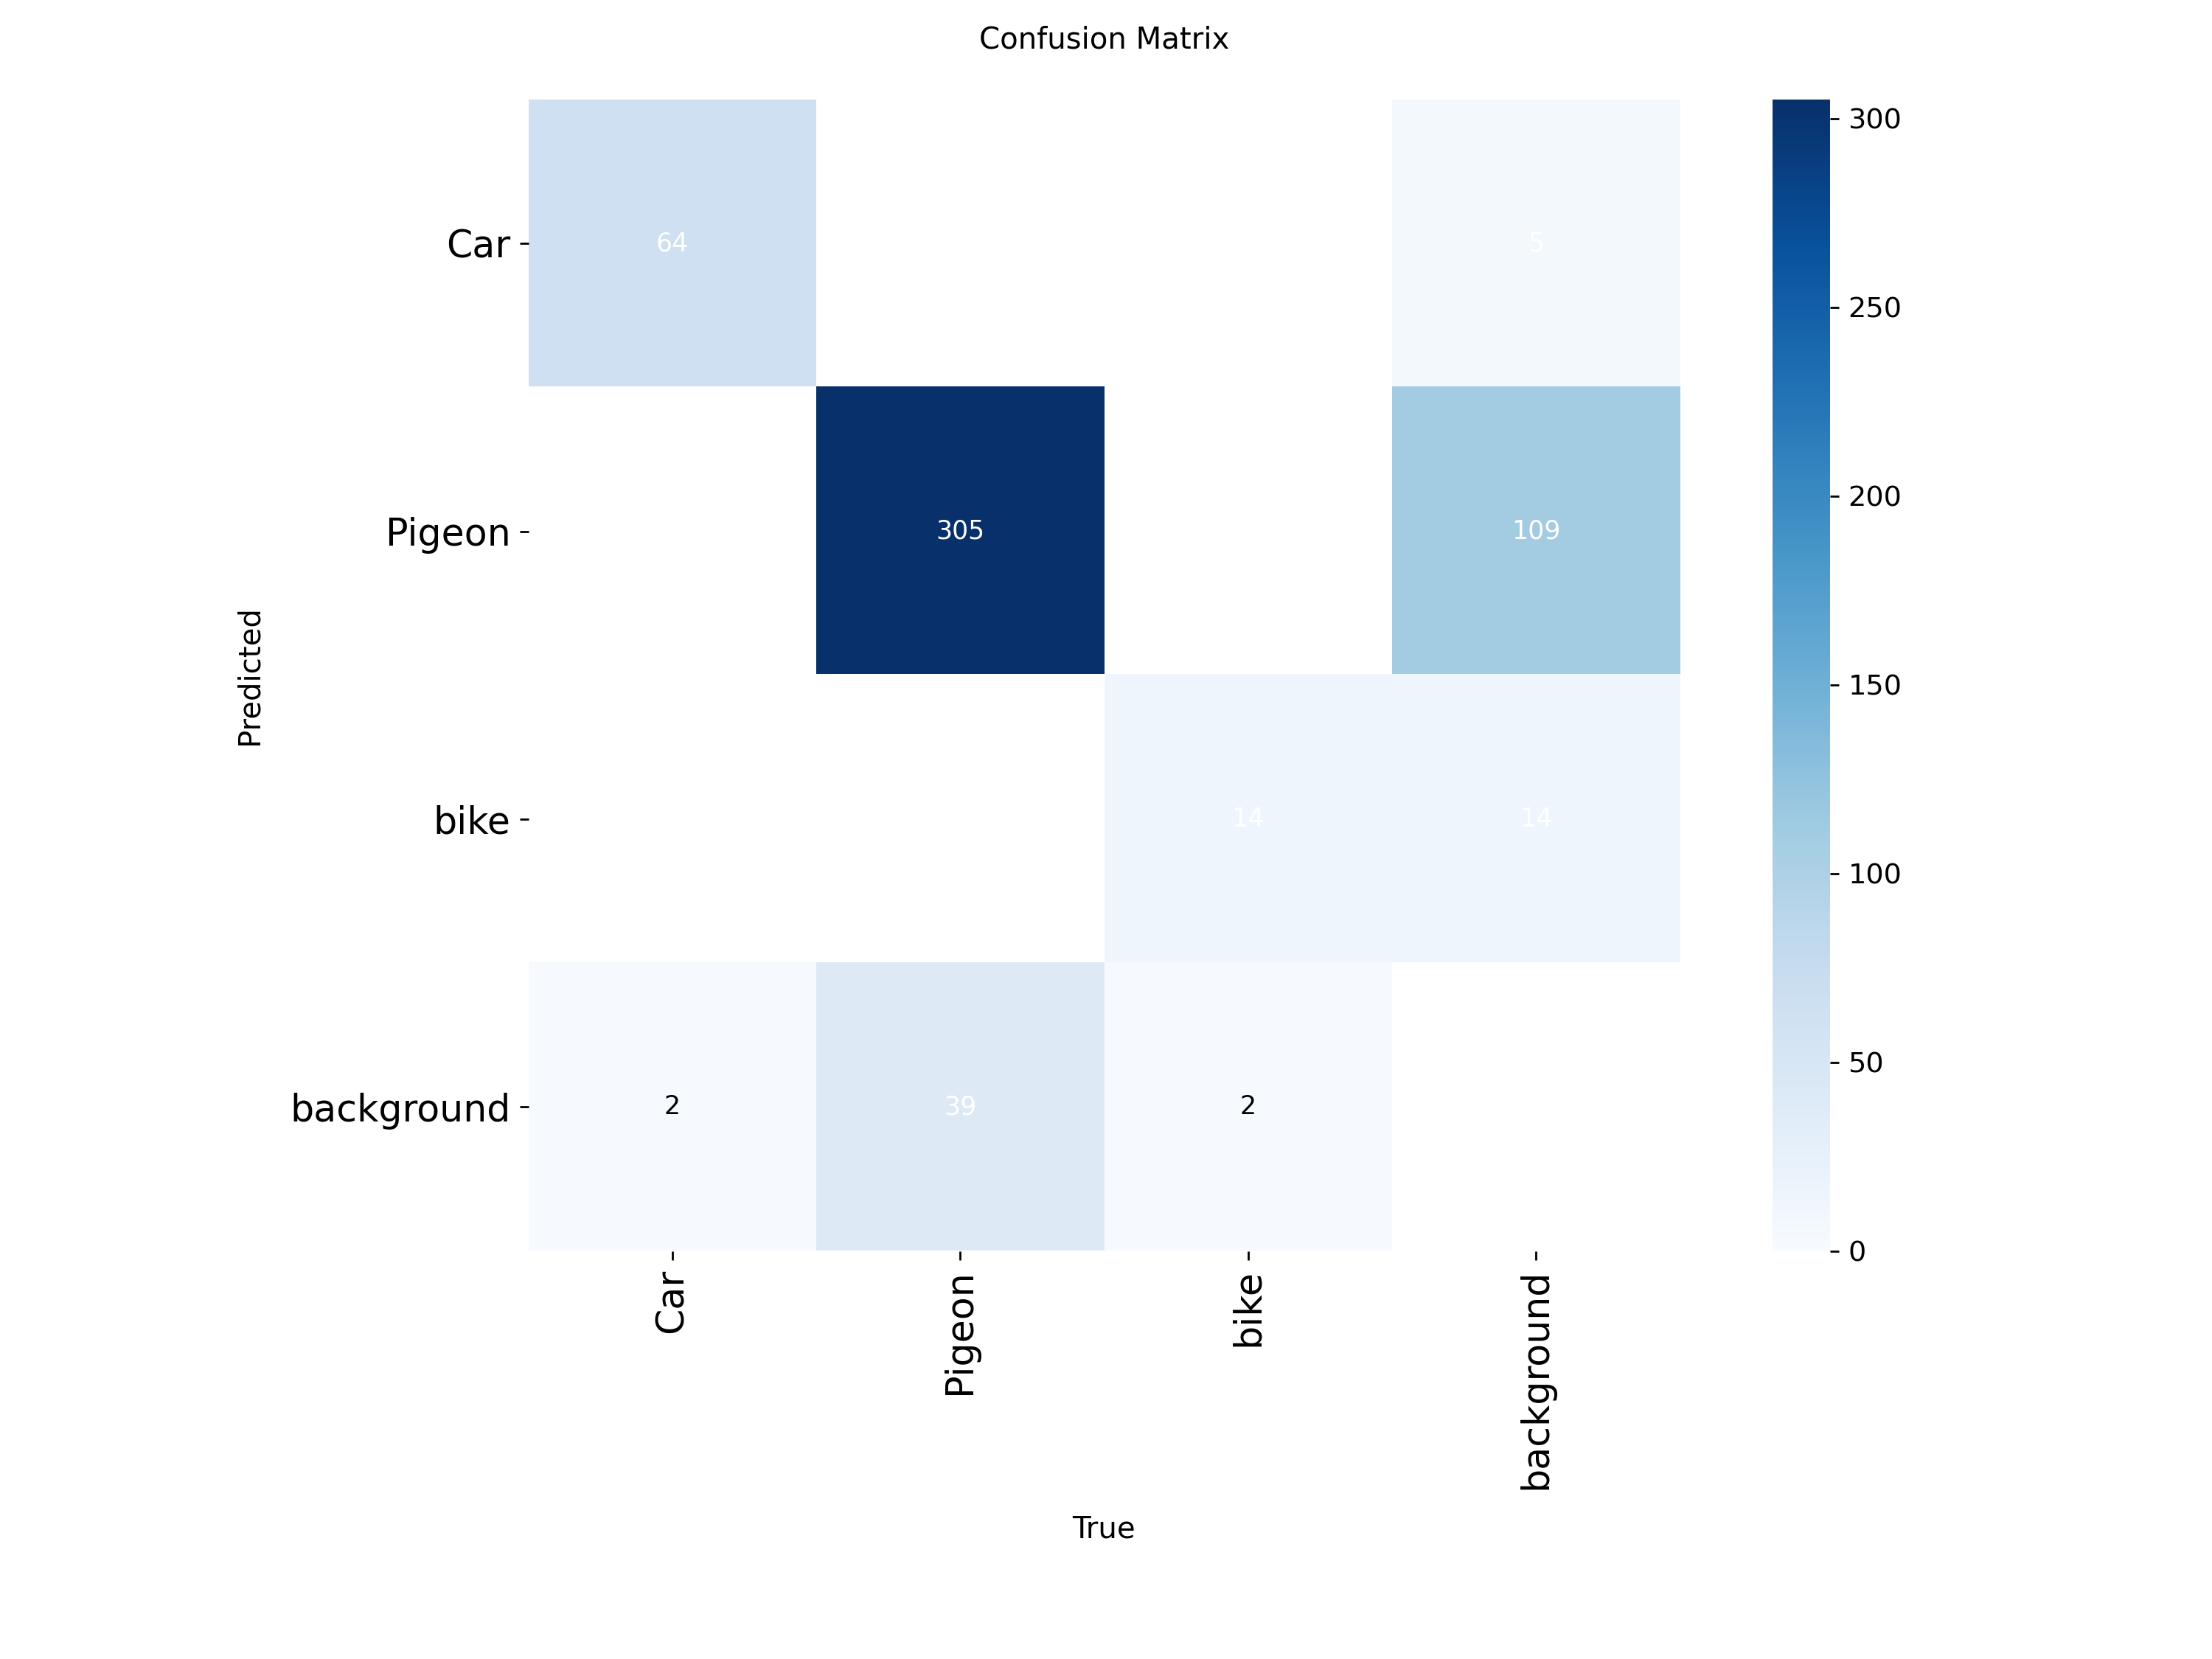

In [9]:
Image("/home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name/confusion_matrix.png", width=900)

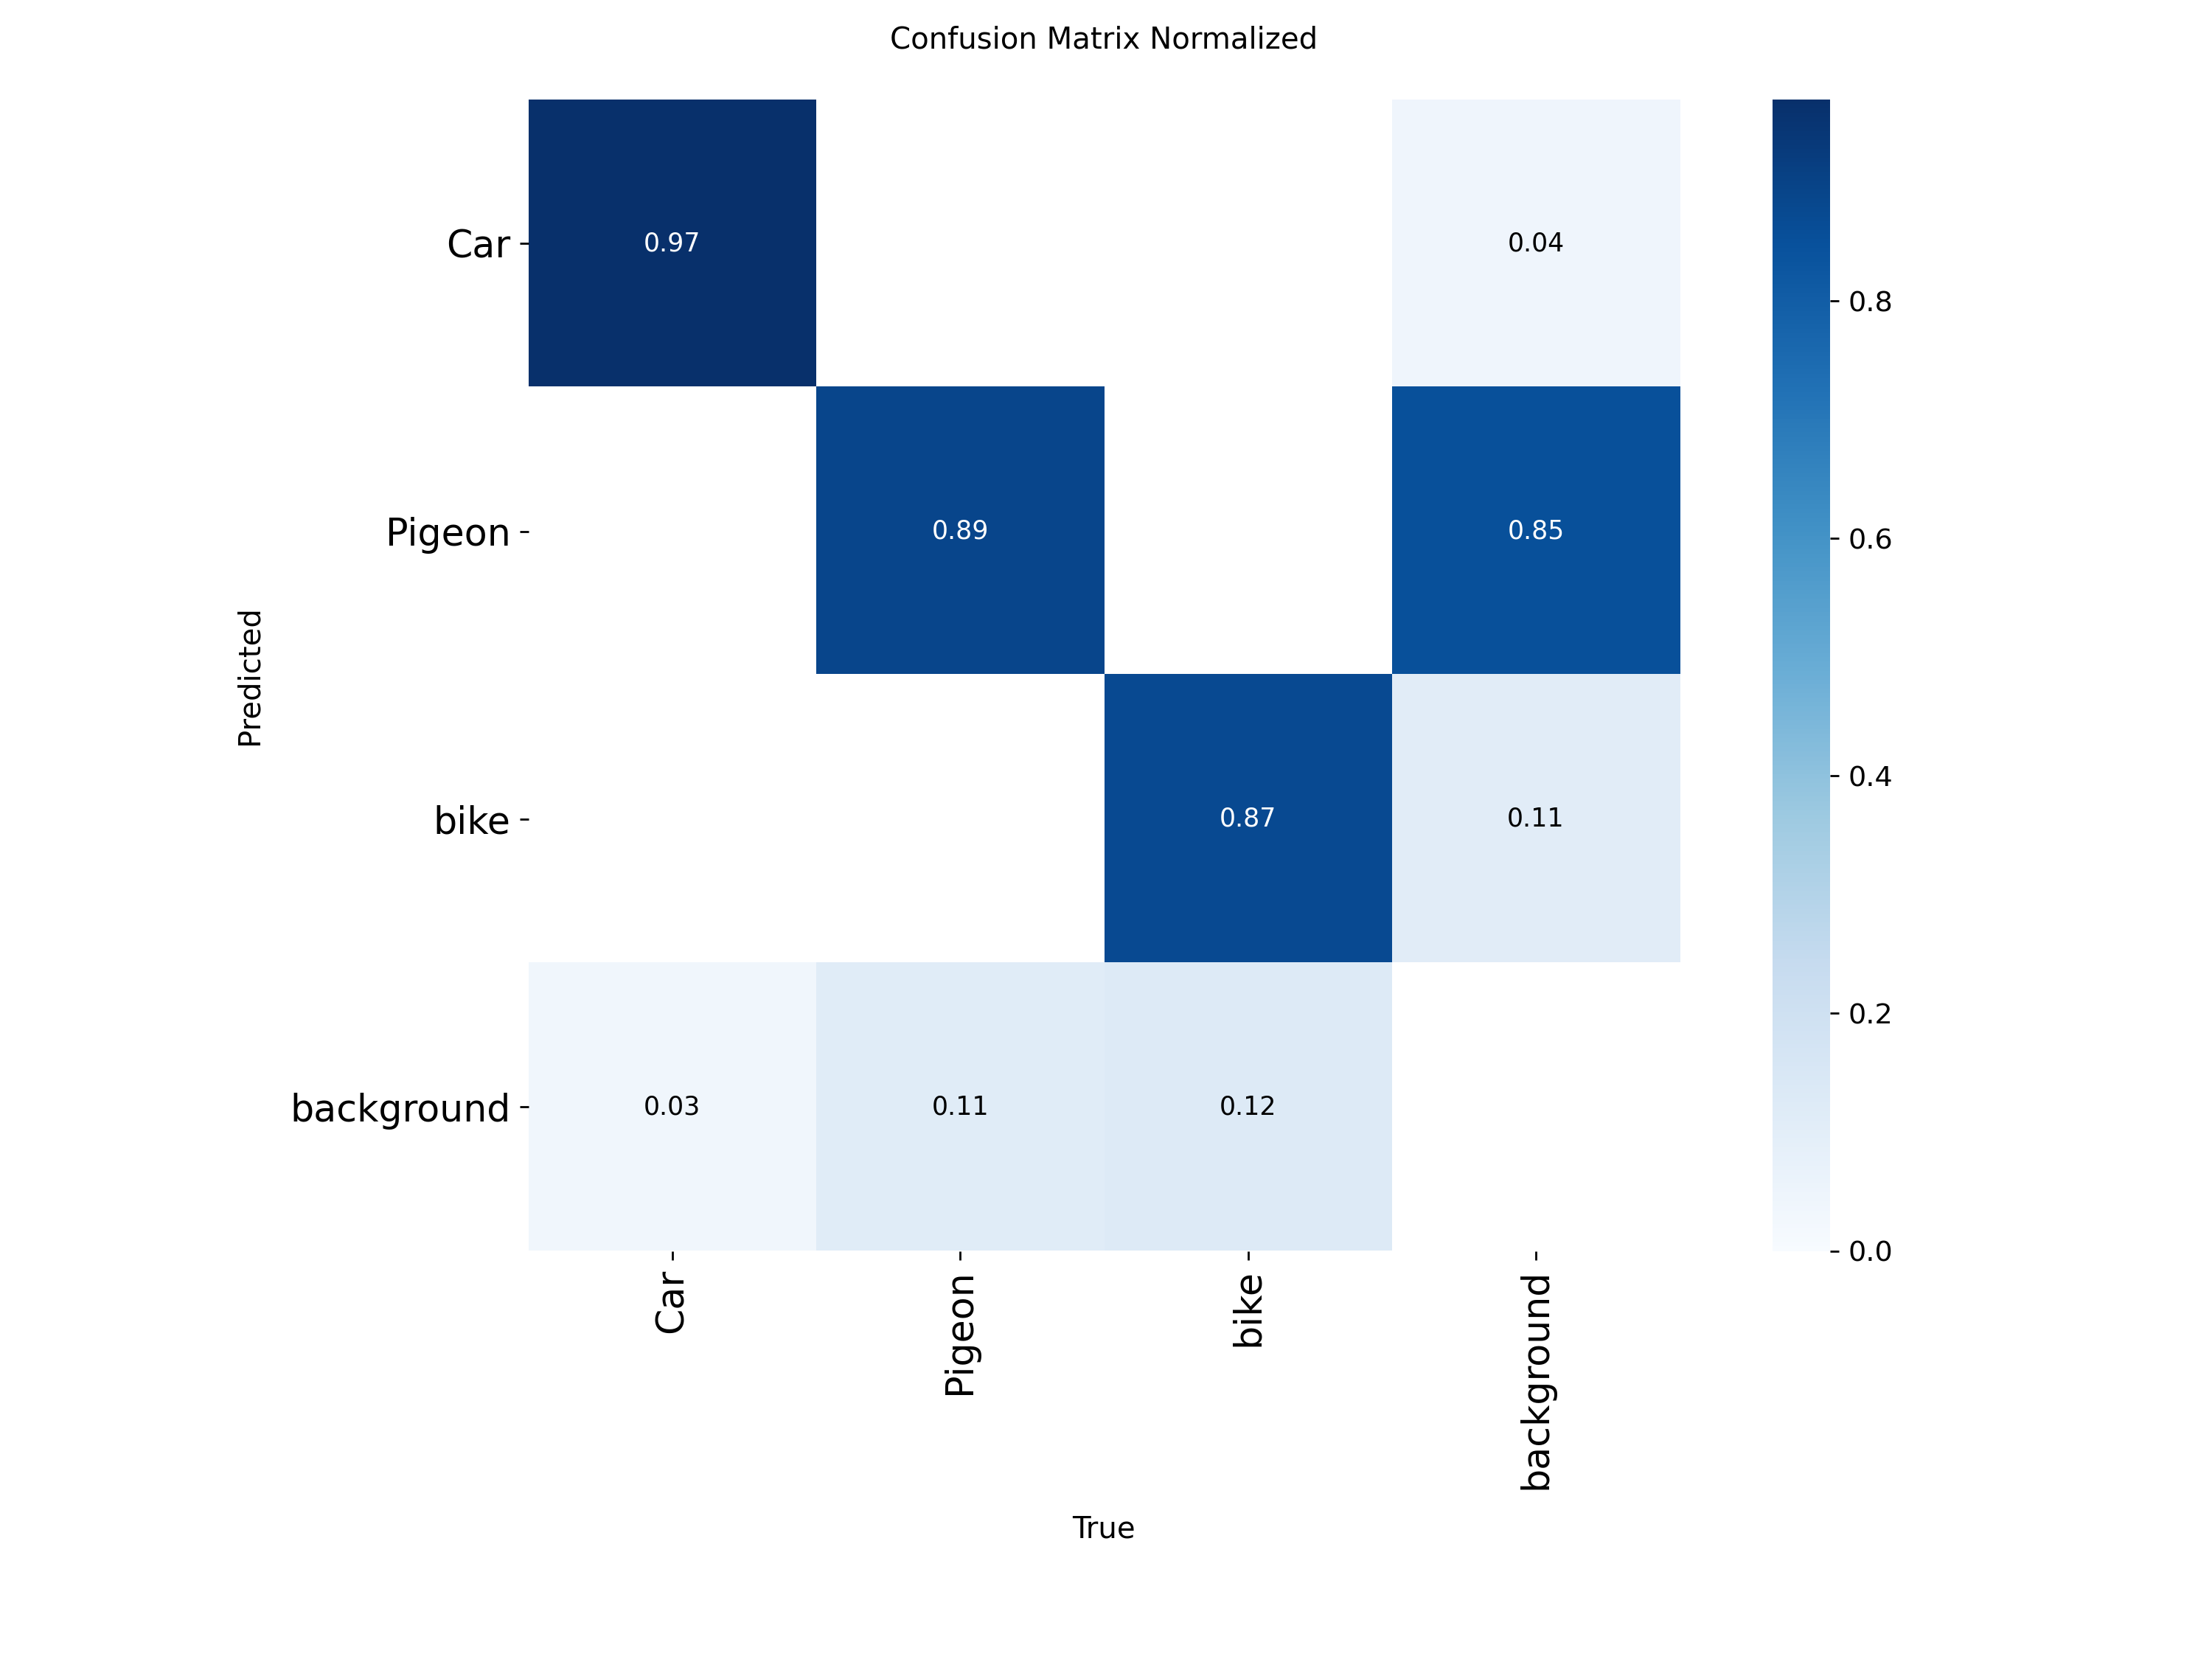

In [10]:
Image("/home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name/confusion_matrix_normalized.png", width=900)

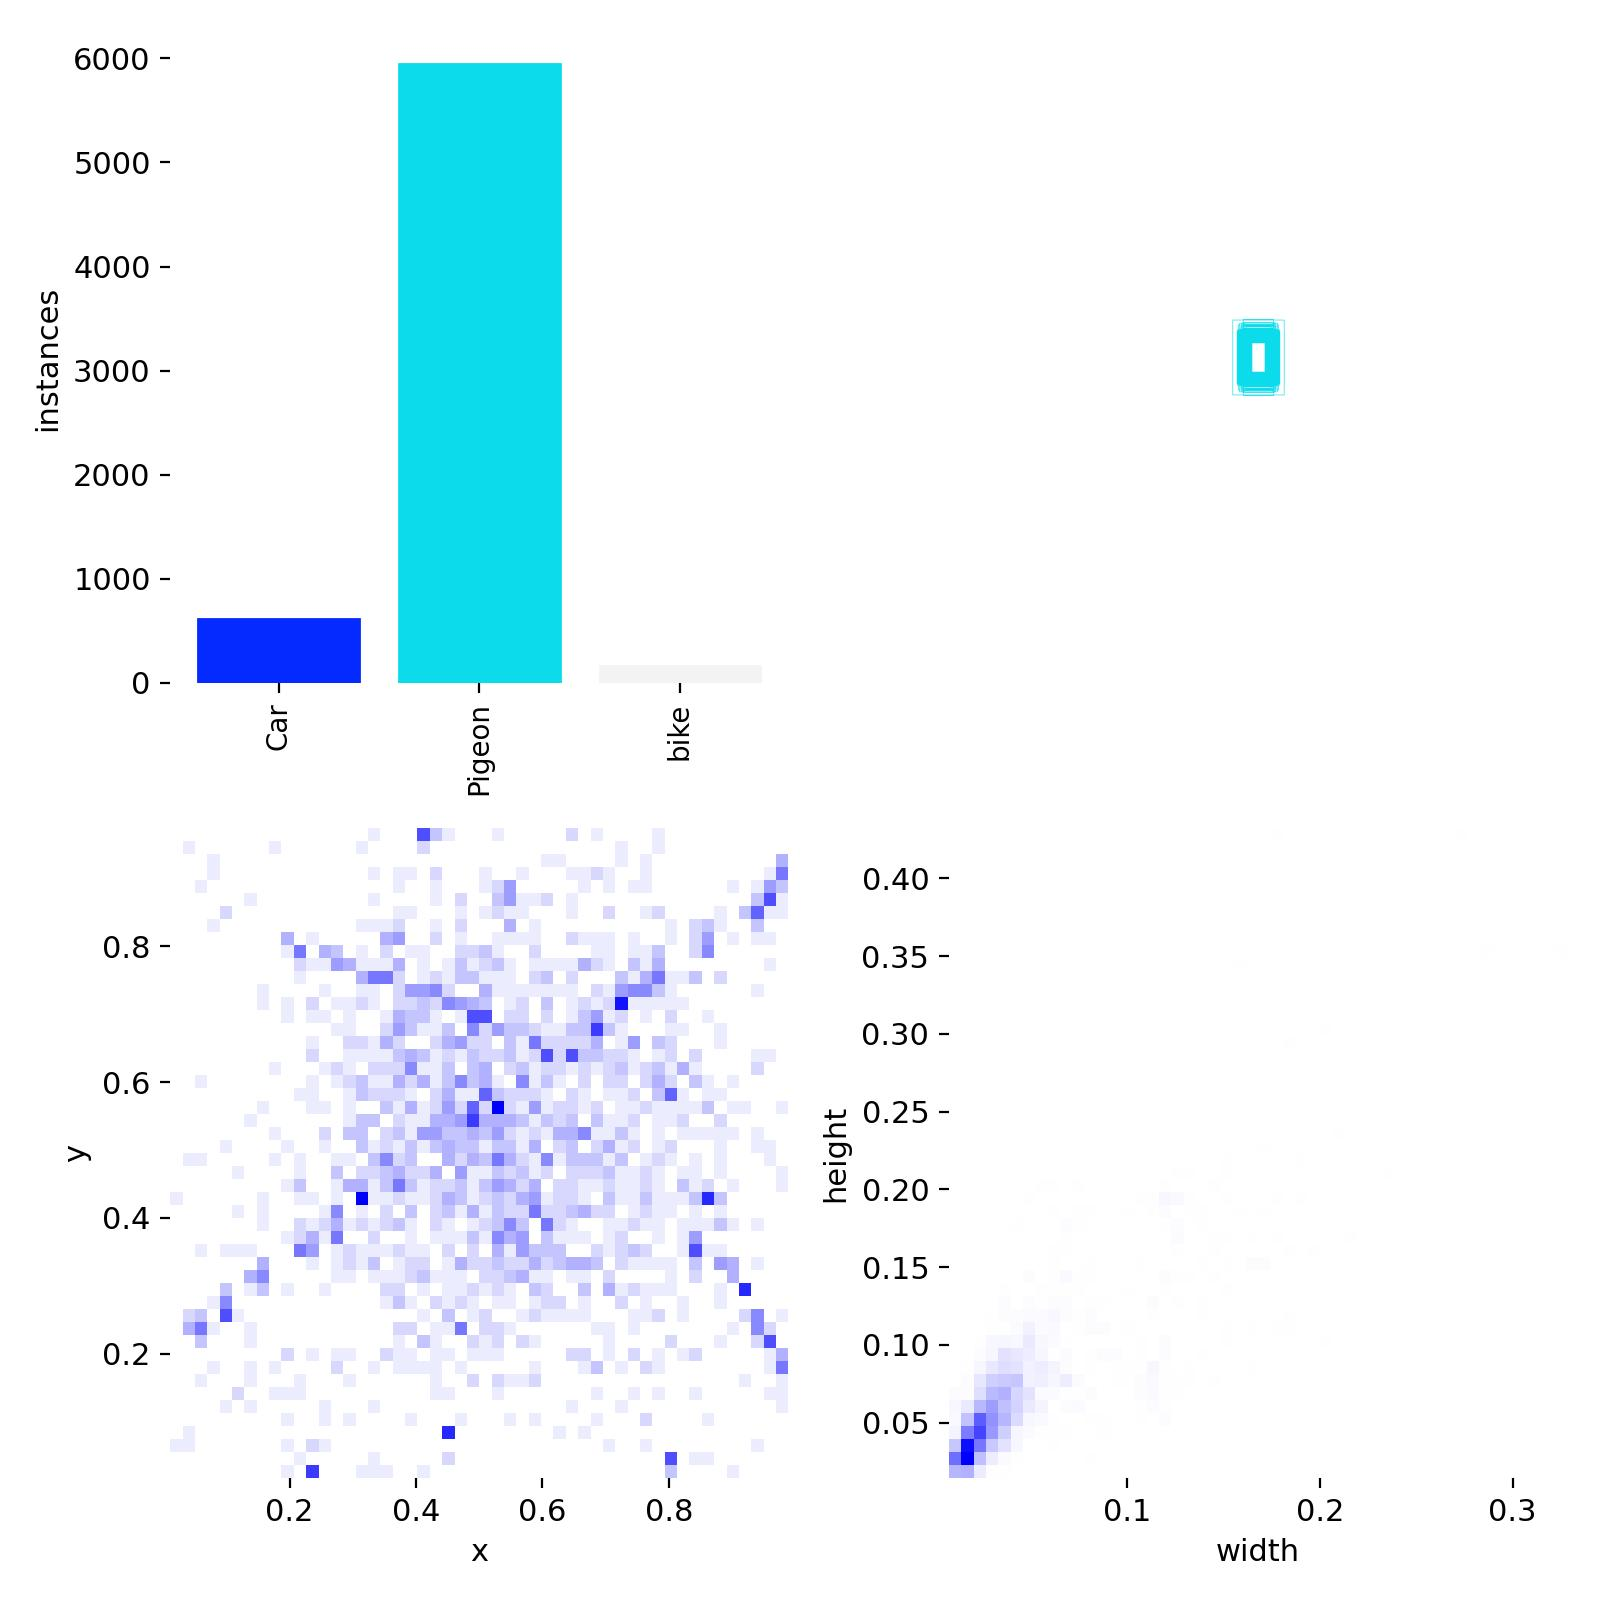

In [11]:
Image("/home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name/labels.jpg", width=900)

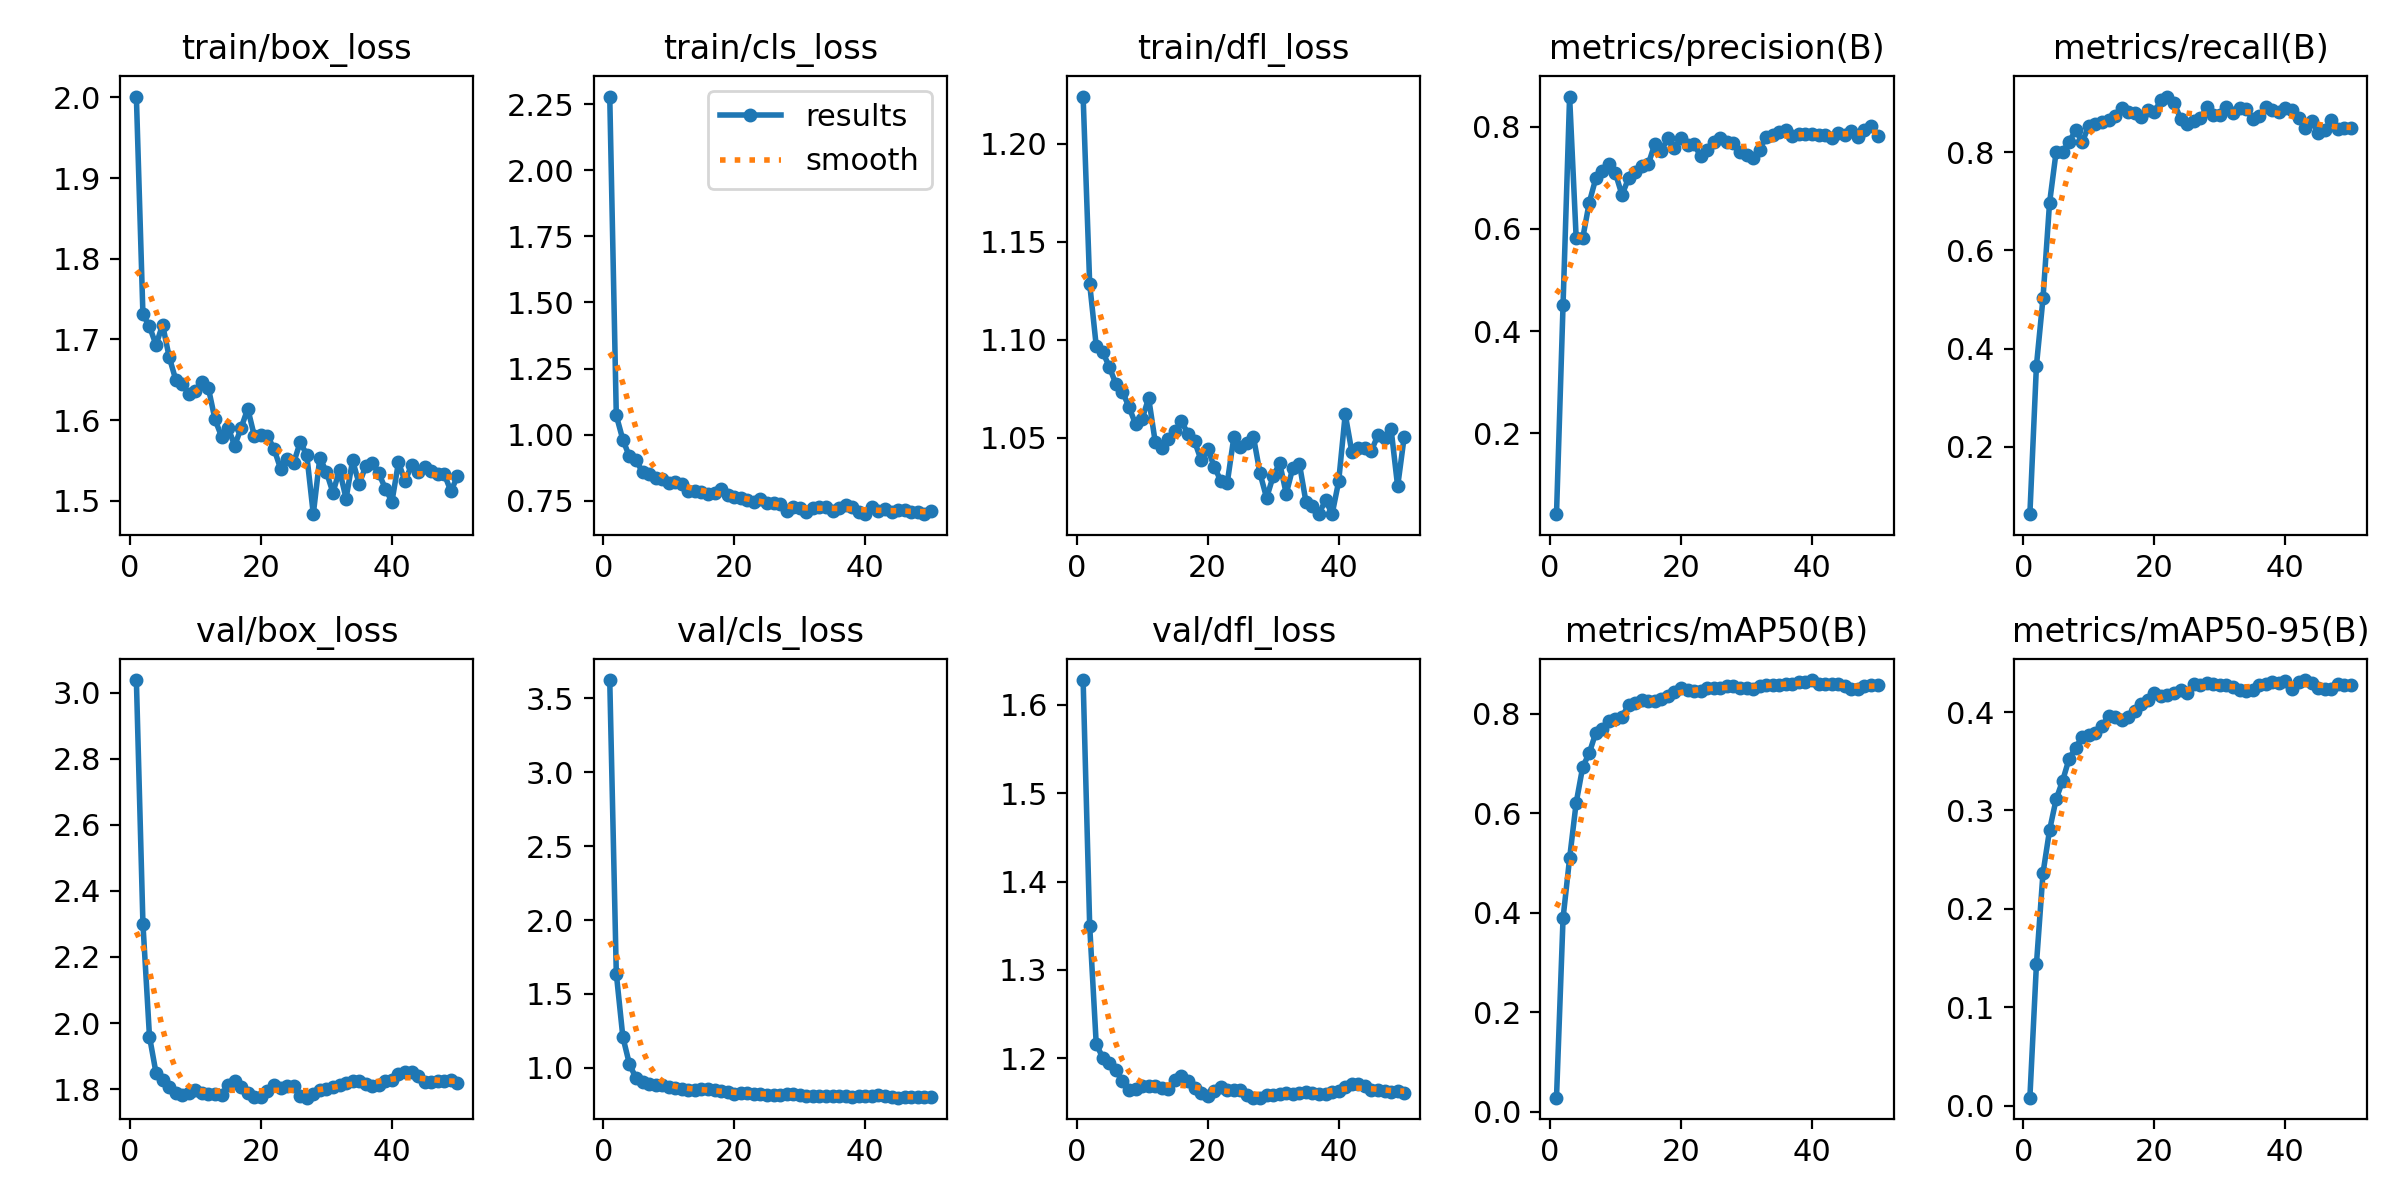

In [12]:
Image("/home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name/results.png", width=900)

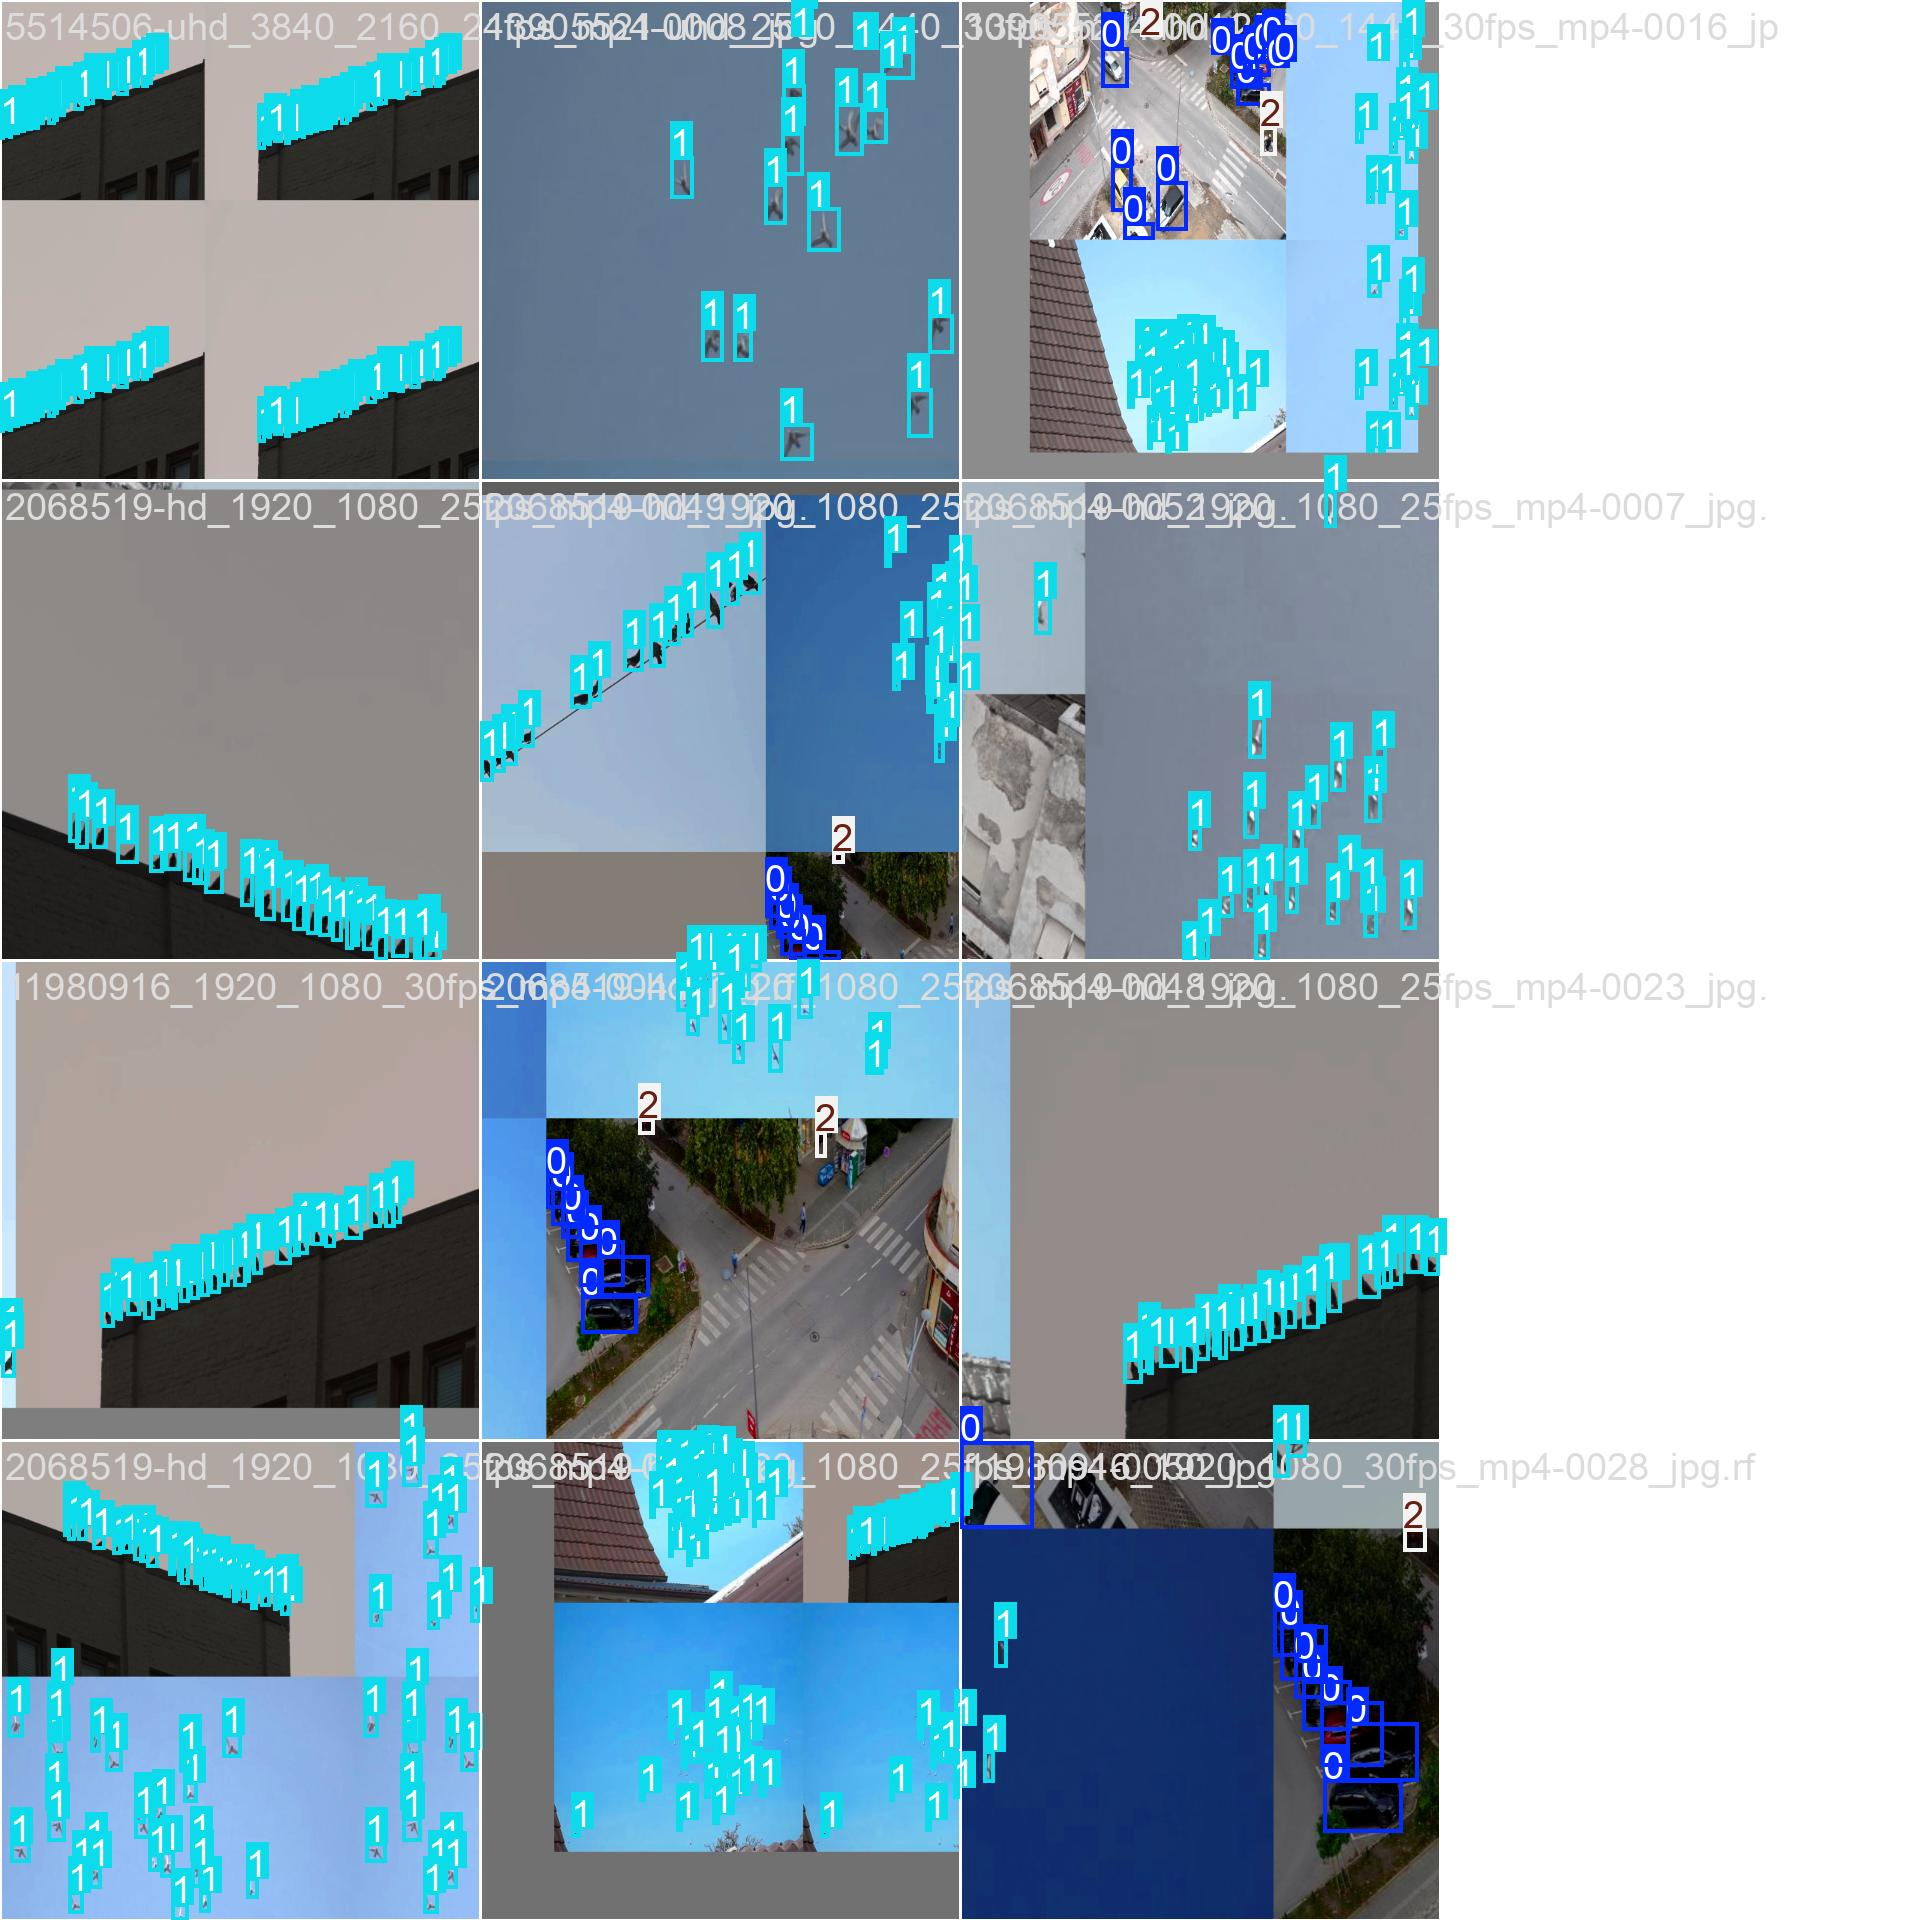

In [13]:
Image("/home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name/train_batch0.jpg", width=900)

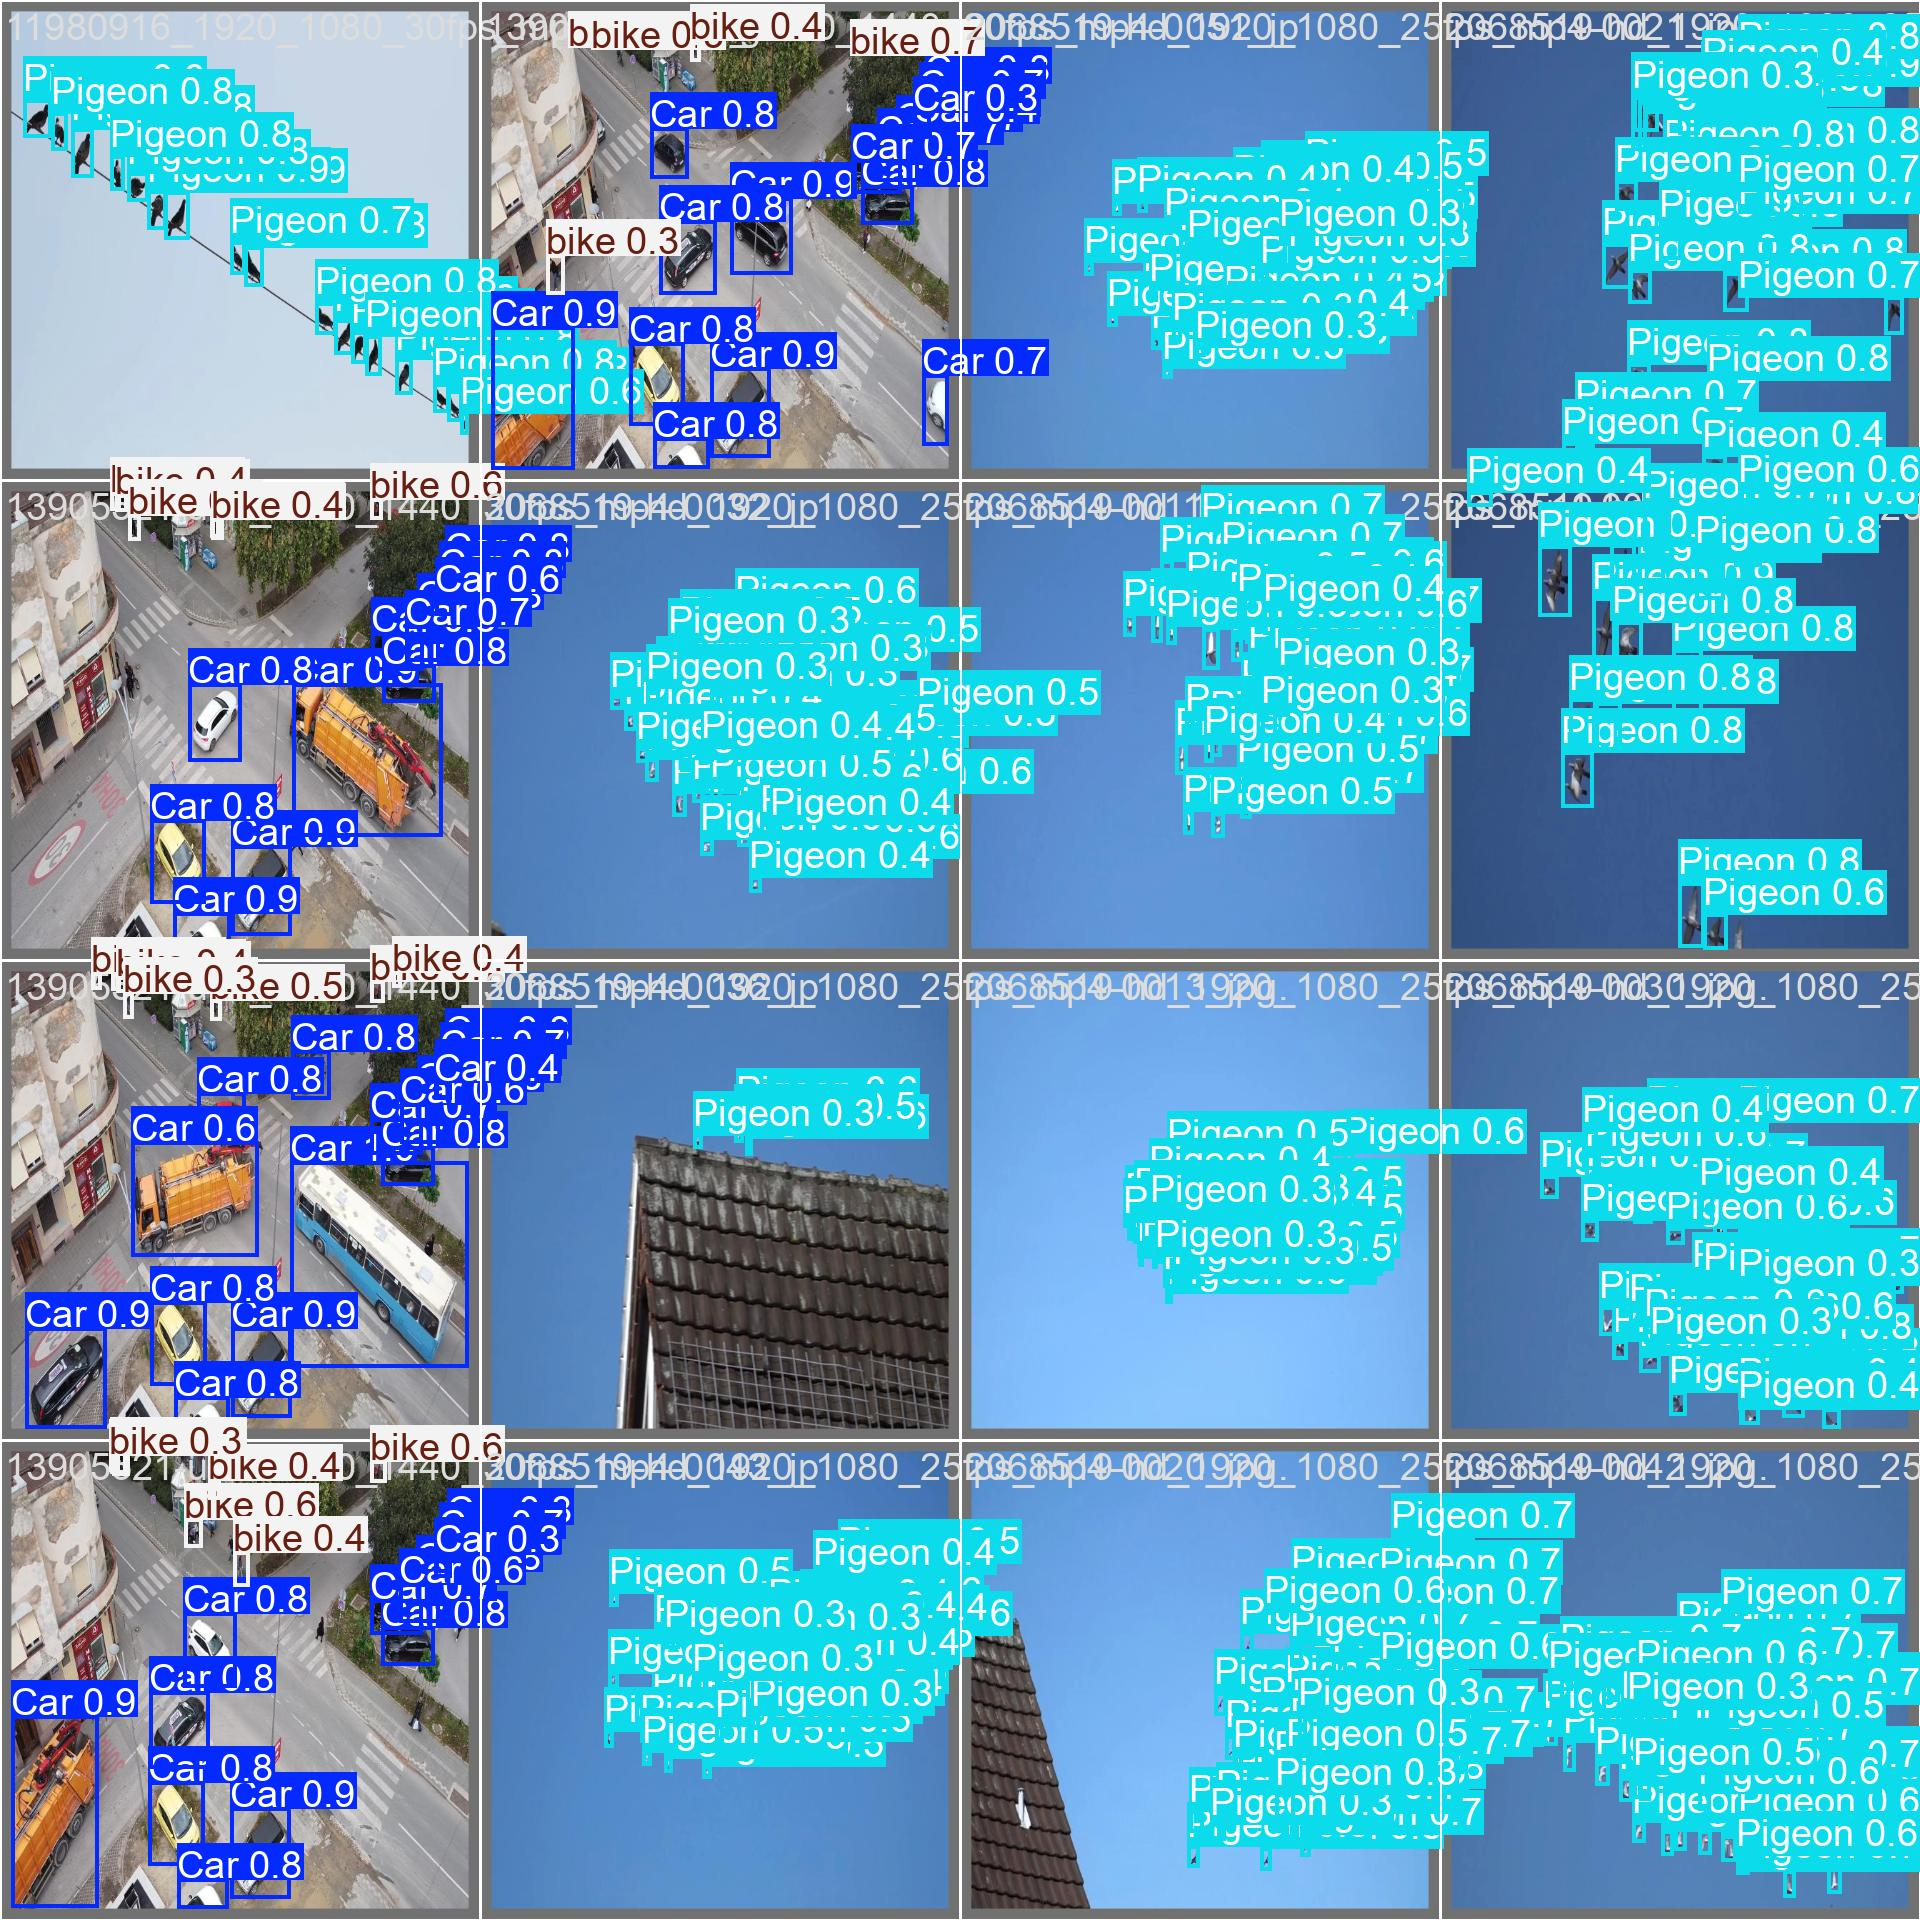

In [14]:
Image("/home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name/val_batch0_pred.jpg", width=900)

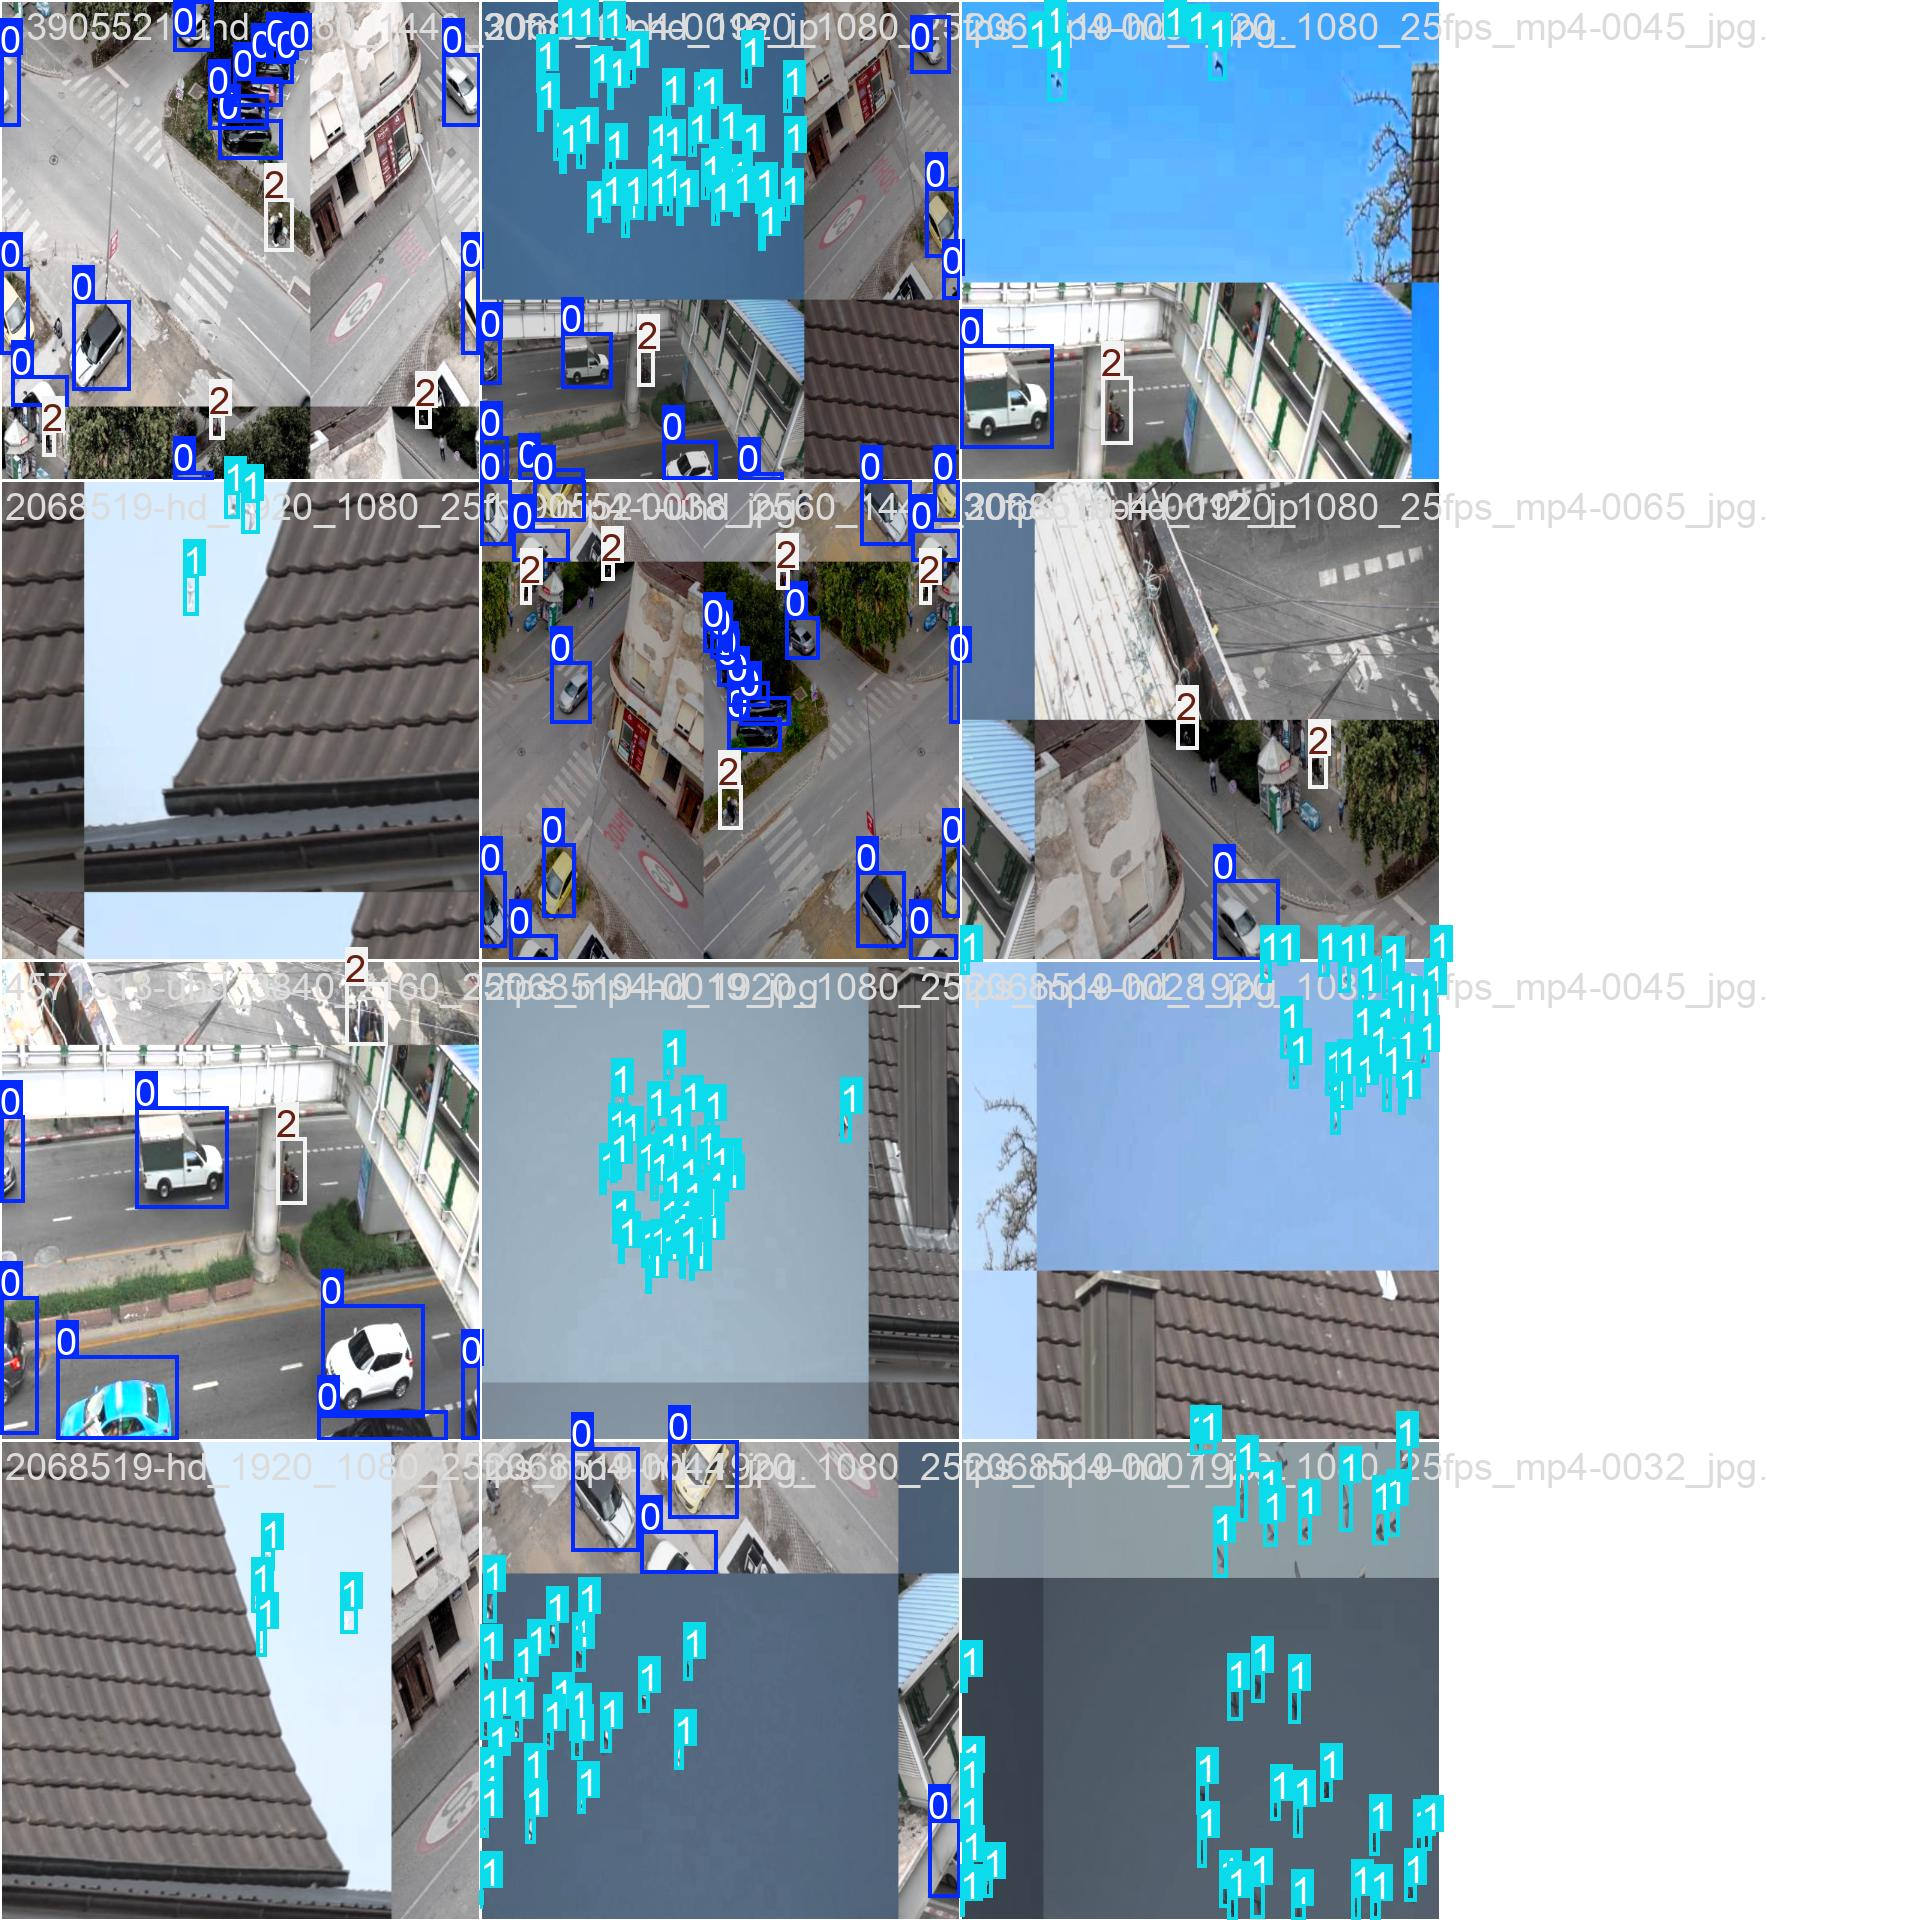

In [15]:
Image("/home/jira-dev/WorkSpace-AumJixs/Super_AI_5/Super-AI-Innovator/runs/detect/exp_name/train_batch1.jpg", width=600)

**Step # 08 Inference with Custom Model on Images**